In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-companies-details/Top_1000_Companies_Dataset.csv


In [43]:
df=pd.read_csv("/kaggle/input/top-1000-companies-details/Top_1000_Companies_Dataset.csv")

In [44]:
df

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118%,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134%,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,NaN,Altimeter,NaN,NaN,4.200000e+09,$414.4M,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76%,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,saas,L2 Point,NaN,NaN,1.100000e+09,$286.2M,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60%,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,NaN,DST Global,NaN,NaN,3.700000e+09,$484.7M,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97%,For Contact Direct Phone Numbers and Emails se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bond Vet,bondvet.com,New York,NY,United States,292,http://www.linkedin.com/company/bondvetclinic,NaN,Veterinary,996,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Bond_Vet,https://www.indeed.com/jobs?q=company%3A(Bond ...,90%,For Contact Direct Phone Numbers and Emails se...
996,CompStak,compstak.com,New York,NY,United States,153,http://www.linkedin.com/company/compstak,2011.0,Analytics,997,...,saas,NaN,NaN,NaN,NaN,$80.9M,https://www.growjo.com/company/CompStak,https://www.indeed.com/jobs?q=company%3A(CompS...,56%,For Contact Direct Phone Numbers and Emails se...
997,Quantum Metric,quantummetric.com,Monument,CO,United States,528,http://www.linkedin.com/company/quantum-metric,2014.0,Analytics,998,...,saas,"Insight Partners, Bain Capital Ventures",NaN,NaN,1.000000e+09,$251M,https://www.growjo.com/company/Quantum_Metric,https://www.indeed.com/jobs?q=company%3A(Quant...,25%,For Contact Direct Phone Numbers and Emails se...
998,Fathom (YC W21),fathom.video,San Francisco,CA,USA,96,http://www.linkedin.com/company/fathom-video,2020.0,Tech Services,999,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Fathom_(YC_W21),https://www.indeed.com/jobs?q=company%3A(Fatho...,231%,For Contact Direct Phone Numbers and Emails se...


In [45]:
print('Descriptive Statistics:')
df.describe()

Descriptive Statistics:


,employees,founded,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,valuation
count,1000.000000,791.000000,1000.000000,1000.000000,9.720000e+02,938.000000,4.680000e+02
mean,319.579000,2012.544880,500.500000,504.007000,1.380356e+08,8.573561,2.259308e+09
std,232.428007,12.326577,288.819436,290.629204,8.448706e+08,28.327318,4.708617e+09
min,22.000000,1854.000000,1.000000,1.000000,1.518000e+06,1.000000,1.000000e+06
25%,130.750000,2012.000000,250.750000,252.750000,2.436000e+07,1.000000,8.975000e+08
50%,246.000000,2015.000000,500.500000,504.500000,4.742900e+07,1.000000,1.200000e+09
75%,466.500000,2017.500000,750.250000,754.250000,9.779318e+07,5.000000,2.011000e+09
max,995.000000,2022.000000,1000.000000,1007.000000,2.068482e+10,660.000000,5.302100e+10


#   Data Types and Nulls

In [62]:
df.shape

(1000, 21)

In [63]:
df.columns

Index(['company_name', 'url', 'city', 'state', 'country', 'employees',
       'linkedin_url', 'founded', 'Industry', 'GrowjoRanking',
       'Previous Ranking', 'estimated_revenues', 'job_openings', 'keywords',
       'LeadInvestors', 'valuation', 'total_funding', 'product_url',
       'indeed_url', 'growth_percentage', 'contact_info'],
      dtype='object')

In [65]:
df.sample(20)

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,estimated_revenues,job_openings,keywords,LeadInvestors,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
970,RenoRun,renorun.com,Montreal,QC,CAN,171,http://www.linkedin.com/company/renorun-inc.,1970-01-01 00:00:00.000002016,Materials,971,...,6.211350e+07,2.0,NaN,NaN,NaN,$163.7M,https://www.growjo.com/company/RenoRun,https://www.indeed.com/jobs?q=company%3A(RenoRun),64%,For Contact Direct Phone Numbers and Emails se...
385,Fresher Jobs,pharmajobadda.com,Indore,Madhya Pradesh,India,445,http://www.linkedin.com/company/fresher-jobs-d...,1970-01-01 00:00:00.000002019,HR,386,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Fresher_Jobs,https://www.indeed.com/jobs?q=company%3A(Fresh...,574%,For Contact Direct Phone Numbers and Emails se...
513,Marsh and McLennan Agency - Northeast,marshmma.com,St. Louis Park,MN,United States,550,http://www.linkedin.com/company/mma_uppermidwest,NaT,Insurance,514,...,1.845250e+08,1.0,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Marsh_and_McLen...,https://www.indeed.com/jobs?q=company%3A(Marsh...,12%,For Contact Direct Phone Numbers and Emails se...
547,OctoML,octoml.ai,Seattle,WA,United States,121,http://www.linkedin.com/company/octoml,NaT,Tech Services,548,...,1.841500e+07,1.0,NaN,NaN,NaN,$131.9M,https://www.growjo.com/company/OctoML,https://www.indeed.com/jobs?q=company%3A(OctoML),30%,For Contact Direct Phone Numbers and Emails se...
600,Nord Security,nordsecurity.com,Vilnius,NaN,Lithuania,957,NaN,NaT,Cybersecurity,601,...,NaN,NaN,NaN,"General Catalyst, BaltCap, Novator Partners",1.600000e+09,$100 M,https://www.growjo.com/company/Nord_Security,https://www.indeed.com/jobs?q=company%3A(Nord ...,55%,For Contact Direct Phone Numbers and Emails se...
619,Impartner Software,impartner.com,South Jordan,UT,United States,216,http://www.linkedin.com/company/impartnersoftware,1970-01-01 00:00:00.000001997,Salestech,620,...,3.416350e+07,11.0,"Customer Support,Finance,Marketing saas",Emergence Capital,NaN,$110M,https://www.growjo.com/company/Impartner_Software,https://www.indeed.com/jobs?q=company%3A(Impar...,14%,For Contact Direct Phone Numbers and Emails se...
209,Multiplier,usemultiplier.com,Singapore,NaN,SGP,393,http://www.linkedin.com/company/multipliertech...,1970-01-01 00:00:00.000002020,HRTech,210,...,7.343140e+07,1.0,NaN,"Tiger Global, Sequoia Capital India",4.000000e+08,$77M,https://www.growjo.com/company/Multiplier,https://www.indeed.com/jobs?q=company%3A(Multi...,164%,For Contact Direct Phone Numbers and Emails se...
337,Gorgias,gorgias.com,San Francisco,CA,United States,303,http://www.linkedin.com/company/gorgias,1970-01-01 00:00:00.000002015,Tech Services,338,...,5.855970e+07,1.0,NaN,"Transpose Platform, Shopify",7.100000e+08,$42.4M,https://www.growjo.com/company/Gorgias,https://www.indeed.com/jobs?q=company%3A(Gorgias),21%,For Contact Direct Phone Numbers and Emails se...
200,PGT Innovations,pgtinnovations.com,Venice,CA,United States,333,http://www.linkedin.com/company/pgtinnovations,1970-01-01 00:00:00.000001980,Materials,201,...,1.080000e+09,3.0,NaN,NaN,1.306000e+09,$123.5M,https://www.growjo.com/company/PGT_Innovations,https://www.indeed.com/jobs?q=company%3A(PGT I...,19%,For Contact Direct Phone Numbers and Emails se...
906,St. Mary's Regional Medical Center,stmarysregional.com,Enid,OK,United States,231,http://www.linkedin.com/company/stmarysregiona...,1970-01-01 00:00:00.000001915,Hospital/Healthcare,907,...,8.850600e+07,1.0,NaN,NaN,NaN,NaN,https://www.growjo.com/company/St._Mary's_Regi...,https://www.indeed.com/jobs?q=company%3A(St. M...,320%,For Contact Direct Phone Numbers and Emails se...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        1000 non-null   object 
 1   url                 999 non-null    object 
 2   city                999 non-null    object 
 3   state               812 non-null    object 
 4   country             994 non-null    object 
 5   employees           1000 non-null   int64  
 6   linkedin_url        997 non-null    object 
 7   founded             791 non-null    float64
 8   Industry            997 non-null    object 
 9   GrowjoRanking       1000 non-null   int64  
 10  Previous Ranking    1000 non-null   int64  
 11  estimated_revenues  972 non-null    float64
 12  job_openings        938 non-null    float64
 13  keywords            368 non-null    object 
 14  LeadInvestors       424 non-null    object 
 15  Accelerator         12 non-null     object 
 16  btype  

In [47]:
df.isnull().sum()

company_name            0
url                     1
city                    1
state                 188
country                 6
employees               0
linkedin_url            3
founded               209
Industry                3
GrowjoRanking           0
Previous Ranking        0
estimated_revenues     28
job_openings           62
keywords              632
LeadInvestors         576
Accelerator           988
btype                 922
valuation             532
total_funding         323
product_url             0
indeed_url              0
growth_percentage       0
contact_info            0
dtype: int64

In [48]:
df.notnull().sum()

company_name          1000
url                    999
city                   999
state                  812
country                994
employees             1000
linkedin_url           997
founded                791
Industry               997
GrowjoRanking         1000
Previous Ranking      1000
estimated_revenues     972
job_openings           938
keywords               368
LeadInvestors          424
Accelerator             12
btype                   78
valuation              468
total_funding          677
product_url           1000
indeed_url            1000
growth_percentage     1000
contact_info          1000
dtype: int64

# Print Missing Values

In [69]:
missing_values= df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values>0])

Missing Values:
url                     1
city                    1
state                 188
country                 6
linkedin_url            3
founded               209
Industry                3
estimated_revenues     28
job_openings           62
keywords              632
LeadInvestors         576
valuation             532
total_funding         323
dtype: int64


# DROP COLUMNS WITH +900 NAN

In [49]:
df= df.drop(['Accelerator','btype'],axis=1)
df

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,estimated_revenues,job_openings,keywords,LeadInvestors,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118%,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134%,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,76987400.0,1.0,NaN,Altimeter,4.200000e+09,$414.4M,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76%,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,38480000.0,4.0,saas,L2 Point,1.100000e+09,$286.2M,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60%,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,39664000.0,1.0,NaN,DST Global,3.700000e+09,$484.7M,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97%,For Contact Direct Phone Numbers and Emails se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bond Vet,bondvet.com,New York,NY,United States,292,http://www.linkedin.com/company/bondvetclinic,NaN,Veterinary,996,...,15000000.0,1.0,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Bond_Vet,https://www.indeed.com/jobs?q=company%3A(Bond ...,90%,For Contact Direct Phone Numbers and Emails se...
996,CompStak,compstak.com,New York,NY,United States,153,http://www.linkedin.com/company/compstak,2011.0,Analytics,997,...,24230500.0,8.0,saas,NaN,NaN,$80.9M,https://www.growjo.com/company/CompStak,https://www.indeed.com/jobs?q=company%3A(CompS...,56%,For Contact Direct Phone Numbers and Emails se...
997,Quantum Metric,quantummetric.com,Monument,CO,United States,528,http://www.linkedin.com/company/quantum-metric,2014.0,Analytics,998,...,98501200.0,38.0,saas,"Insight Partners, Bain Capital Ventures",1.000000e+09,$251M,https://www.growjo.com/company/Quantum_Metric,https://www.indeed.com/jobs?q=company%3A(Quant...,25%,For Contact Direct Phone Numbers and Emails se...
998,Fathom (YC W21),fathom.video,San Francisco,CA,USA,96,http://www.linkedin.com/company/fathom-video,2020.0,Tech Services,999,...,14645000.0,1.0,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Fathom_(YC_W21),https://www.indeed.com/jobs?q=company%3A(Fatho...,231%,For Contact Direct Phone Numbers and Emails se...


In [50]:
df.isnull().sum()

company_name            0
url                     1
city                    1
state                 188
country                 6
employees               0
linkedin_url            3
founded               209
Industry                3
GrowjoRanking           0
Previous Ranking        0
estimated_revenues     28
job_openings           62
keywords              632
LeadInvestors         576
valuation             532
total_funding         323
product_url             0
indeed_url              0
growth_percentage       0
contact_info            0
dtype: int64

# Visualizations

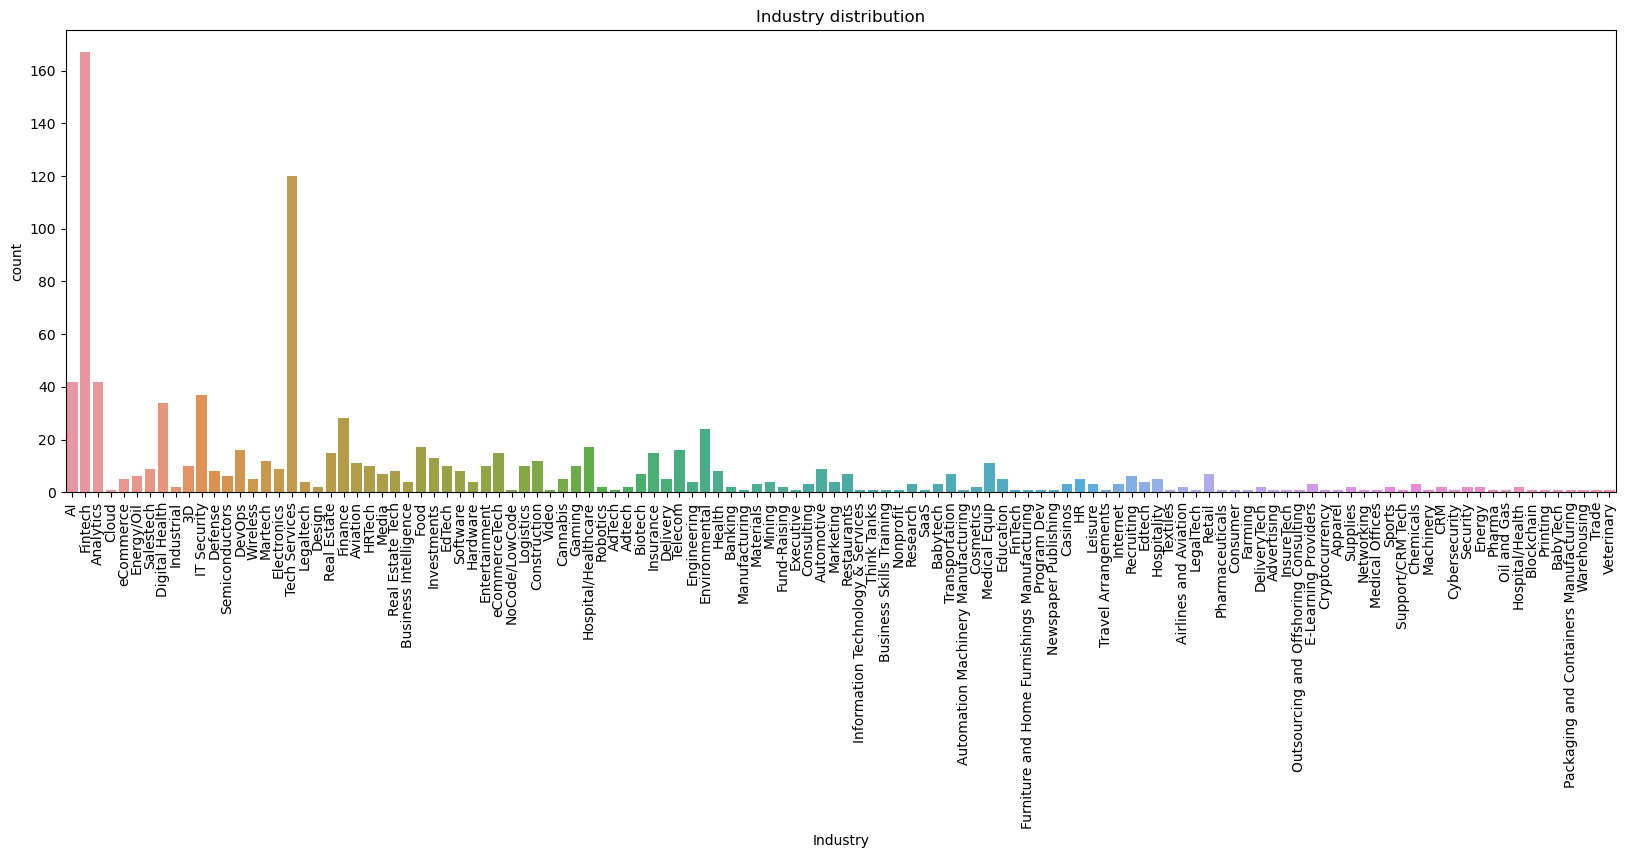

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='Industry')
plt.xticks(rotation=90)
plt.title('Industry distribution')
plt.show()

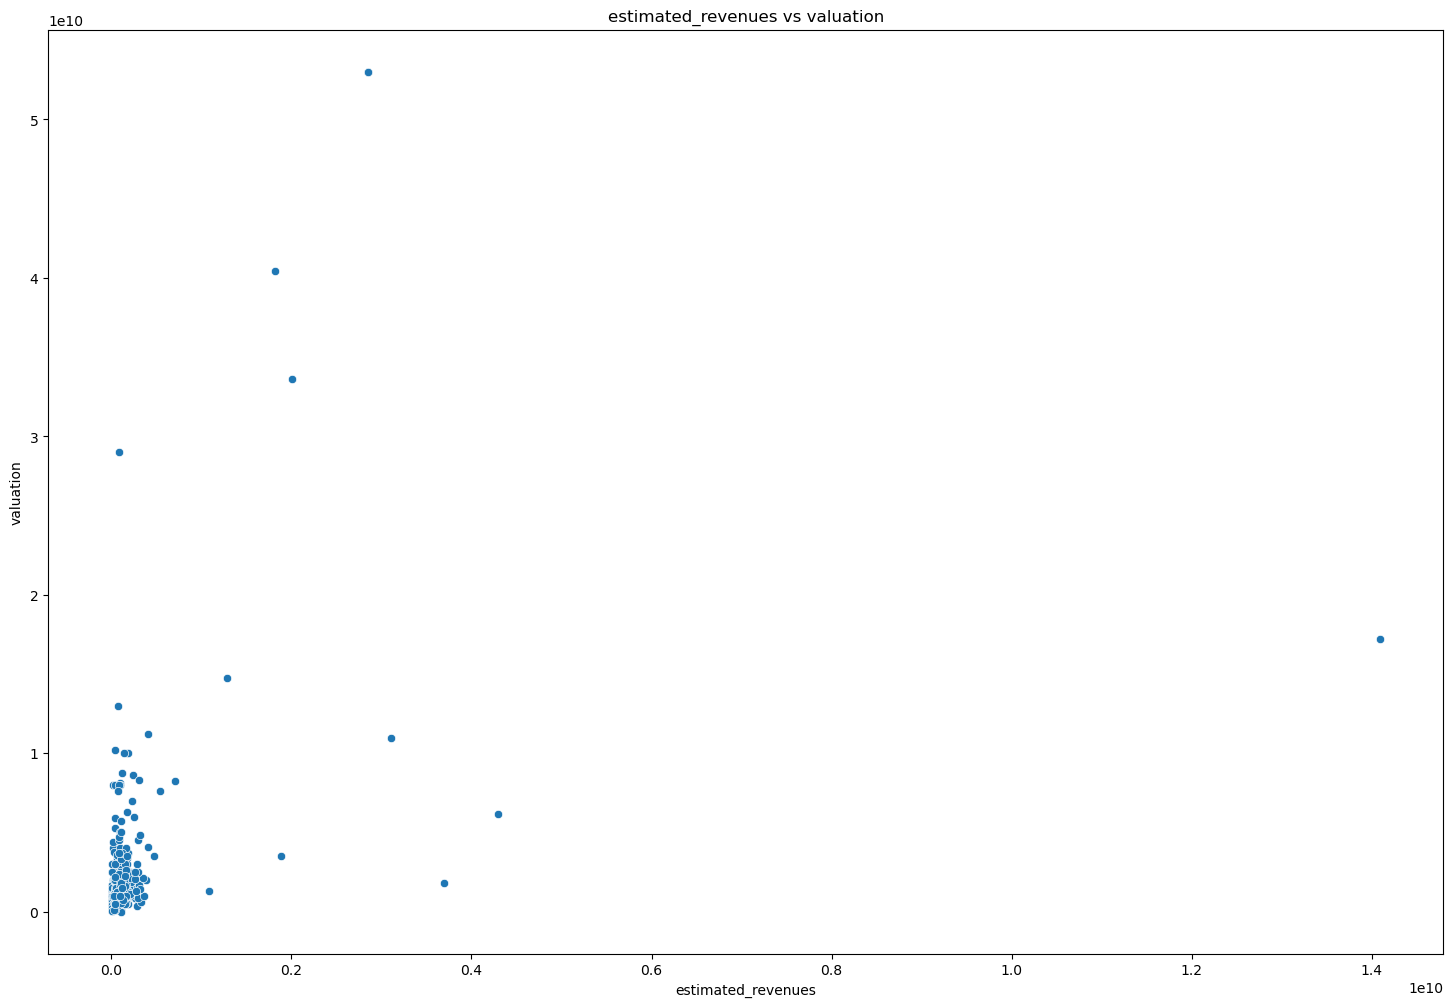

In [52]:
plt.figure(figsize=(18,12))
sns.scatterplot(data=df,x='estimated_revenues',y='valuation')
plt.title('estimated_revenues vs valuation')
plt.show()

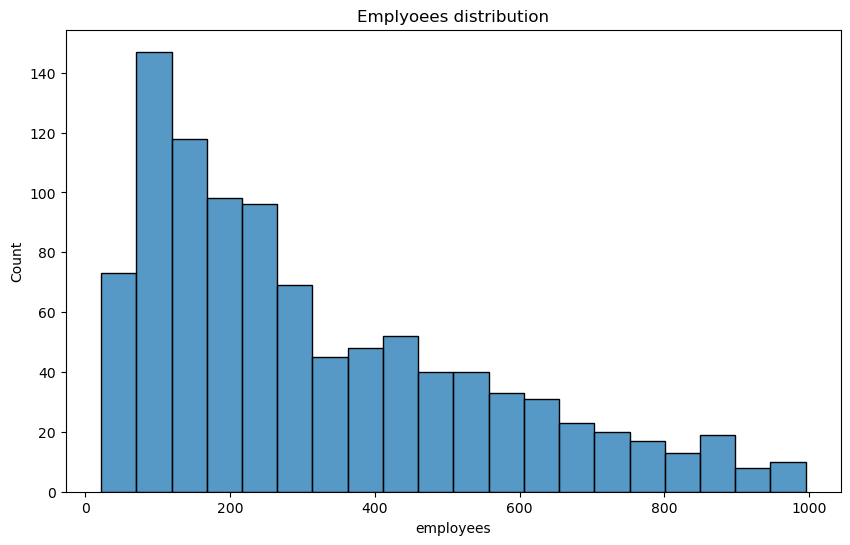

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='employees',bins=20)
plt.title('Emplyoees distribution')
plt.show()

/tmp/ipykernel_32/907425410.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



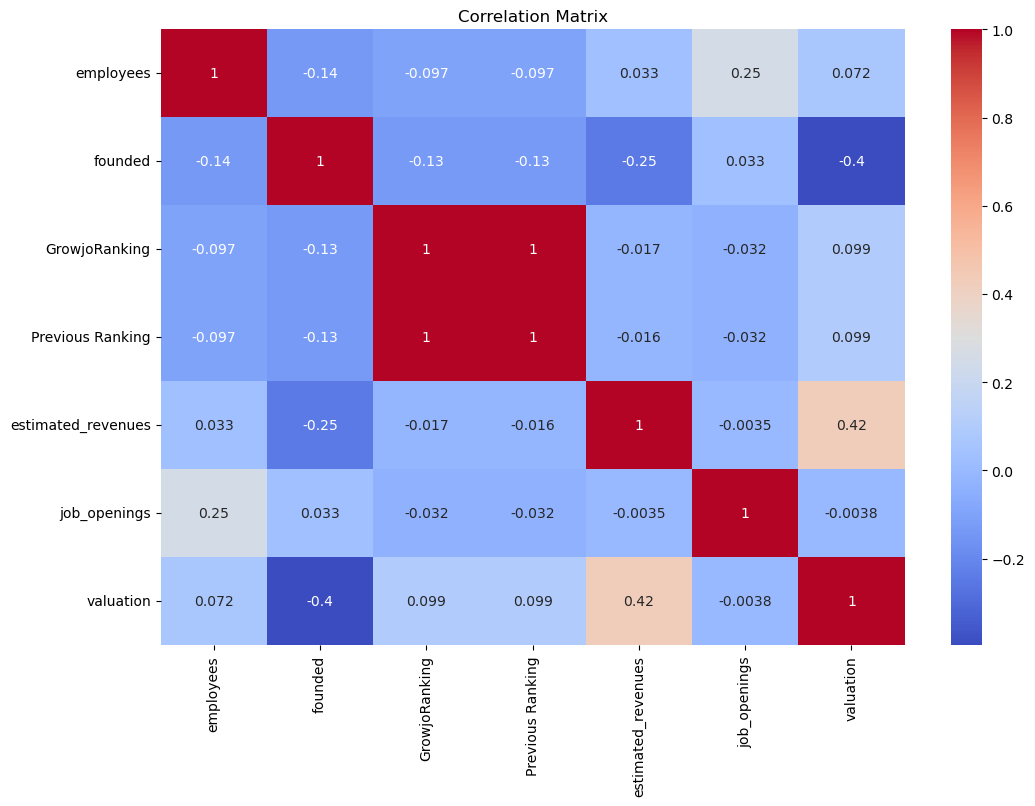

In [54]:
correlation_matrix= df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

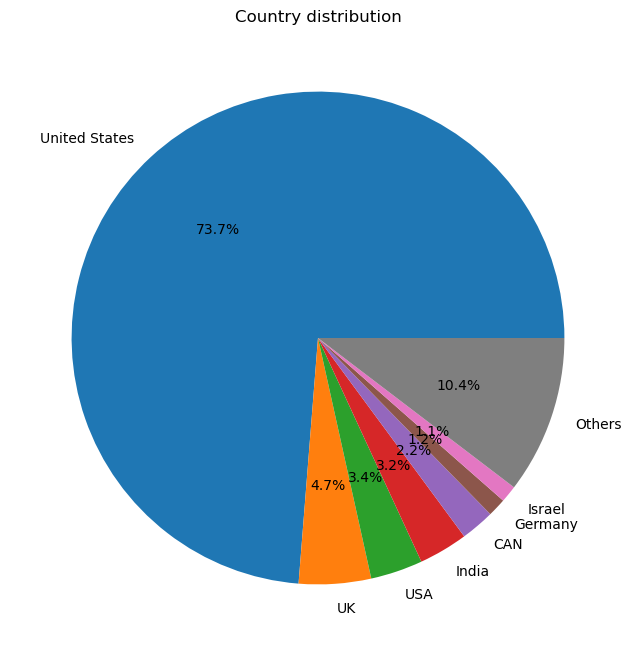

In [55]:
country_count= df['country'].value_counts()


top_countries = country_count.head(7)
other_countries_count= country_count[7:].sum()
top_countries['Others'] =other_countries_count
plt.figure(figsize=(8,8))
top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.title('Country distribution')
plt.ylabel('')
plt.show()

In [56]:
import plotly.express as px
fig= px.bar(df,x='Industry',title='Industry distribution')
fig.show()

In [57]:
fig= px.scatter(df, x='estimated_revenues',y='valuation',title='Estimated revenues vs valuation')
fig.show()

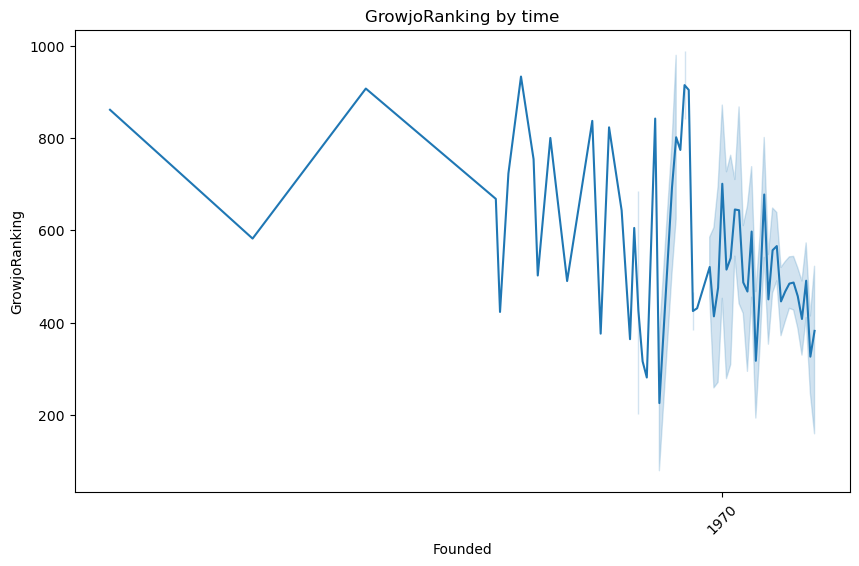

In [58]:
df['founded']= pd.to_datetime(df['founded'])
df_sorted= df.sort_values(by='founded')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_sorted, x='founded',y='GrowjoRanking')
plt.title('GrowjoRanking by time')
plt.xlabel('Founded')
plt.ylabel('GrowjoRanking')
plt.xticks(rotation=45)
plt.show()

# Firsts companies data

In [59]:
first_company = df.iloc[0]
first_company

company_name                                                     OpenAI
url                                                          openai.com
city                                                      San Francisco
state                                                                CA
country                                                   United States
employees                                                           655
linkedin_url                     http://www.linkedin.com/company/openai
founded                                   1970-01-01 00:00:00.000002015
Industry                                                             AI
GrowjoRanking                                                         1
Previous Ranking                                                      1
estimated_revenues                                           88722200.0
job_openings                                                       25.0
keywords              Artificial Intelligence, Online Gaming, No

In [60]:
first_company = df.iloc[1]
first_company

company_name                                                    Alchemy
url                                                         alchemy.com
city                                                      San Francisco
state                                                                CA
country                                                   United States
employees                                                           201
linkedin_url                 http://www.linkedin.com/company/alchemyinc
founded                                                             NaT
Industry                                                        Fintech
GrowjoRanking                                                         2
Previous Ranking                                                      2
estimated_revenues                                           39269750.0
job_openings                                                        1.0
keywords                                                        

In [61]:
first_company = df.iloc[2]
first_company

company_name                                                   dbt Labs
url                                                          getdbt.com
city                                                       Philadelphia
state                                                                PA
country                                                   United States
employees                                                           511
linkedin_url                    http://www.linkedin.com/company/dbtlabs
founded                                   1970-01-01 00:00:00.000002016
Industry                                                      Analytics
GrowjoRanking                                                         3
Previous Ranking                                                      3
estimated_revenues                                           76987400.0
job_openings                                                        1.0
keywords                                                        